<a href="https://colab.research.google.com/github/tejaswidevi/cal/blob/main/Copy_of_blank_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis-2a0ab')
jovian.set_colab_id('1Sel3ak9A4yj3pptFpnCmWHBTCDRvnc8h')

In [ ]:
!pip install jovian --upgrade --quiet

# US Accidents Exploratory Data Analysis
**TODO - talk about EDA**

T***ODO - talk about the dataset (source, what it contains, how it will be useful)***

    -Kaggle
    -informaiton about accidents
    -can use useful to prevent accidents
    -mention that this does not contain data about New York 

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

download_url ='https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: penmatsatejaswi
Your Kaggle Key: ··········


  2%|▏         | 5.00M/299M [00:00<00:10, 28.1MB/s]

100%|██████████| 299M/299M [00:03<00:00, 81.1MB/s]


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec20.csv'

# **Data Preparation and Cleaning**
    1.Load the file using Pandas
    2.Look at some information about the data & the columns
    3.Fix any missing or incorrect values

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [ ]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

# Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Amenity                  0.000000e+00
Street                   0.000000e+00
Source                   0.000000e+00
Severity    

In [ ]:
type(missing_percentages)

pandas.core.series.Series

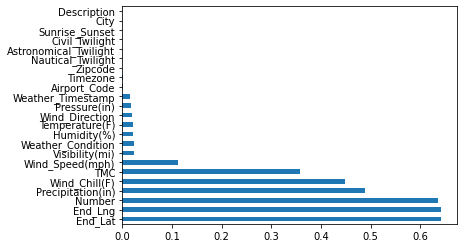

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

# Remove columns that you don't want to use.

**Exploratory Analysis and Visualization**

**Columns we'll analyze:**

    1.City
    2.Start Time
    3.Start Lat, Start Lng
    4.Temperature
    5.Weather Condition

In [ ]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**City**

In [ ]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
4232536       Riverside
4232537       San Diego
4232538          Orange
4232539     Culver City
4232540        Highland
Name: City, Length: 4232541, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

12251

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Houston        114905
Los Angeles     92701
Charlotte       88887
Dallas          77303
Austin          70538
                ...  
Obion               1
Velarde             1
Transfer            1
South Shore         1
Rock Creek          1
Name: City, Length: 12250, dtype: int64

In [ ]:
cities_by_accident[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

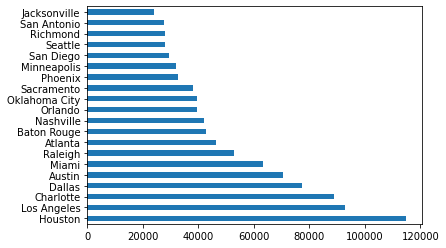

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

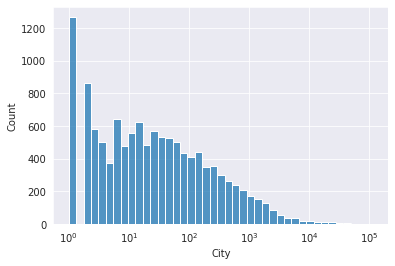

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Norborne       1
Irons          1
Bonham         1
Ladoga         1
Shawboro       1
              ..
Obion          1
Velarde        1
Transfer       1
South Shore    1
Rock Creek     1
Name: City, Length: 1267, dtype: int64

# **Start Time**

In [1]:
df.Start_Time

NameError: ignored

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [2]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

NameError: ignored

**A high percentage of accidents occur between 6 am to 10 am (probably 
people in a hurry to get to work)**

**Next higest percentage is 3 pm to 6 pm.**

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

**Is the distribution of accidents by hour the same on weekends as on weekdays.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


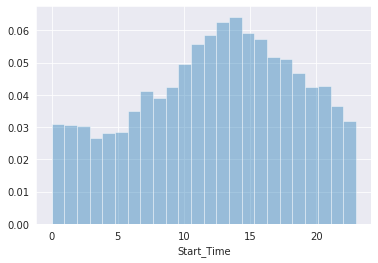

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


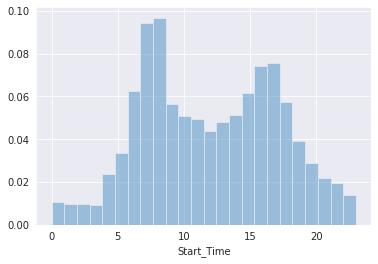

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

**On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


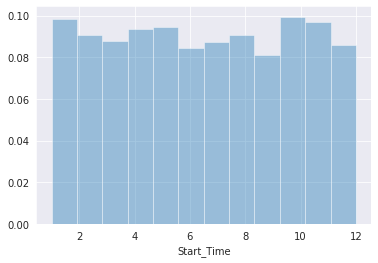

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'MapQuest']
sns.distplot(df_2019_Bing.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

Can you explain the month-wise trend of accidents?


*   Much data is missing for 2016. Maybe even 2017.
*   There seems to be some issue with the Bing data


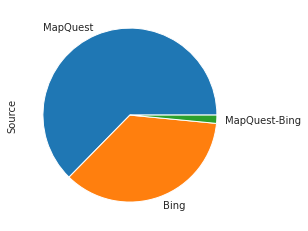

In [ ]:
df.Source.value_counts().plot(kind='pie')



*   Consider excluding Bing data, seems to have issues.



**Start Latitude & Longitude**

In [ ]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [ ]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

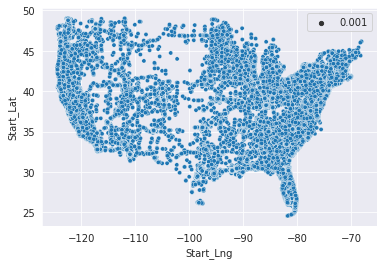

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [ ]:
import folium

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1393474    39.679405
3962818    37.323640
3737366    37.638248
817627     41.569027
392209     32.868053
             ...    
3348644    30.187672
1732562    33.653748
913824     30.421619
504893     42.431622
2376902    39.007664
Name: Start_Lat, Length: 100, dtype: float64
1393474    -75.694580
3962818   -122.049510
3737366   -120.911561
817627     -87.356064
392209     -96.667900
              ...    
3348644    -97.646688
1732562    -84.005554
913824     -97.665680
504893     -71.102798
2376902    -94.694046
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# **Ask & answer questions**
Are there more accidents in warmer or colder areas?

1.   Are there more accidents in warmer or colder areas?

2.  Which 5 states have the highest number of accidents? How about per capita?
3.  Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5.  What time of the day are accidents most frequent in? - ANSWERED
6.  Which days of the week have the most accidents?
7.  Which months have the most accidents?
8.  What is the trend of accidents year over year (decreasing/increasing?)
9.  When is accidents per unit of traffic the highest.

# **Summary and Conclusion**
**Insights:**


*   No data from New York
*   The number of accidents per city decreases exponentially
*  Less than 5% of cities have more than 1000 yearly accidents.
*   Over 1200 cities have reported just one accident (need to investigate)

